In [1]:
# Import Dependencies
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
data_science = Path("data_science_salaries.csv")
data_science_df = pd.read_csv(data_science)
data_science_df

,job_title,experience_level,employment_type,work_models,work_year,employee_residence,salary,salary_currency,salary_in_usd,company_location,company_size
0,Data Engineer,Mid-level,Full-time,Remote,2024,United States,148100,USD,148100,United States,Medium
1,Data Engineer,Mid-level,Full-time,Remote,2024,United States,98700,USD,98700,United States,Medium
2,Data Scientist,Senior-level,Full-time,Remote,2024,United States,140032,USD,140032,United States,Medium
3,Data Scientist,Senior-level,Full-time,Remote,2024,United States,100022,USD,100022,United States,Medium
4,BI Developer,Mid-level,Full-time,On-site,2024,United States,120000,USD,120000,United States,Medium
...,...,...,...,...,...,...,...,...,...,...,...
6594,Staff Data Analyst,Entry-level,Contract,Hybrid,2020,Canada,60000,CAD,44753,Canada,Large
6595,Staff Data Analyst,Executive-level,Full-time,On-site,2020,Nigeria,15000,USD,15000,Canada,Medium
6596,Machine Learning Manager,Senior-level,Full-time,Hybrid,2020,Canada,157000,CAD,117104,Canada,Large
6597,Data Engineer,Mid-level,Full-time,Hybrid,2020,Austria,65000,EUR,74130,Austria,Large


In [3]:
data_science_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6599 entries, 0 to 6598
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   job_title           6599 non-null   object
 1   experience_level    6599 non-null   object
 2   employment_type     6599 non-null   object
 3   work_models         6599 non-null   object
 4   work_year           6599 non-null   int64 
 5   employee_residence  6599 non-null   object
 6   salary              6599 non-null   int64 
 7   salary_currency     6599 non-null   object
 8   salary_in_usd       6599 non-null   int64 
 9   company_location    6599 non-null   object
 10  company_size        6599 non-null   object
dtypes: int64(3), object(8)
memory usage: 567.2+ KB


In [4]:
data_science_df['job_title'].value_counts()

job_title
Data Engineer                1307
Data Scientist               1243
Data Analyst                  910
Machine Learning Engineer     629
Analytics Engineer            246
                             ... 
Deep Learning Researcher        1
Power BI Developer              1
Marketing Data Scientist        1
AI Product Manager              1
Sales Data Analyst              1
Name: count, Length: 132, dtype: int64

In [5]:
data_science_df['job_title'] = data_science_df['job_title'].replace({'BI Data Analyst': 'Business Intelligence Analyst', 
                                                               'Power BI Developer': 'Business Intelligence Analyst',                                                              
                                                               'BI Developer': 'Business Intelligence Developer',
                                                               'BI Analyst': 'Business Intelligence Analyst',
                                                               'Business Data Analyst': 'Data Analyst',
                                                               'Big Data Engineer': 'Data Engineer',
                                                               'Data Science Manager': 'Data Scientist',
                                                               'Data Scientist Lead': 'Data Scientist',
                                                               'Data Infrastructure Engineer': 'Data Engineer',
                                                               'Data Operations Engineer': 'Data Engineer',
                                                               'Cloud Data Engineer': 'Data Engineer',
                                                               'Data Integration Engineer': 'Data Engineer',
                                                               'Data Management Analyst': 'Data Analyst',
                                                               'Financial Data Analyst': 'Data Analyst',
                                                               'Finance Data Analyst': 'Data Analyst',
                                                               'AI Architect': 'AI Related',
                                                               'AI Developer': 'AI Related',
                                                               'AI Engineer': 'AI Related',
                                                               'AI Product Manager': 'AI Related',
                                                               'AI Programmer': 'AI Related',
                                                               'AI Research Engineer': 'AI Related',
                                                               'AI Scientist': 'AI Related',
                                                               'Data Science': 'Data Scientist', 
                                                               'Data Visualization Analyst': 'Data Analyst',
                                                               'BI Data Engineer': 'Data Engineer',
                                                                'Data Visualization Engineer': 'Data Engineer',
                                                                'Head of Data Science': 'Data Scientist',
                                                                'Lead Data Analyst': 'Data Analyst',
                                                                'Lead Data Engineer': 'Data Engineer',
                                                                'Lead Data Scientist': 'Data Scientist',
                                                                'Lead Machine Learning Engineer': 'Machine Learning Engineer',
                                                                'Machine Learning Infrastructure Engineer': 'Machine Learning Engineer',
                                                                'Machine Learning Operations Engineer': 'Machine Learning Engineer',
                                                                'Machine Learning Research Engineer': 'Machine Learning Engineer',
                                                                'Machine Learning Software Engineer': 'Machine Learning Engineer',
                                                                'Marketing Data Engineer': 'Data Engineer',
                                                                'Marketing Data Scientist': 'Data Scientist',
                                                                'Marketing Data Analyst': 'Data Analyst',
                                                                'Principal Data Analyst': 'Data Analyst',
                                                                'Principal Data Engineer': 'Data Engineer',
                                                                'Principal Data Scientist': 'Data Scientist',
                                                                'Product Data Analyst': 'Data Analyst',
                                                                'Sales Data Analyst': 'Sales Data Analyst',
                                                                'Software Data Engineer': 'Data Engineer',
                                                                'Staff Data Analyst': 'Data Analyst',
                                                                'Staff Data Scientist': 'Data Scientist',
                                                                'Staff Machine Learning Engineer': 'Machine Learning Engineer',
                                                                'Principal Machine Learning Engineer': 'Machine Learning Engineer',})

In [6]:
data_science_df['job_title'].value_counts()

job_title
Data Scientist                   1422
Data Engineer                    1367
Data Analyst                      962
Machine Learning Engineer         690
Analytics Engineer                246
                                 ... 
Consultant Data Engineer            1
Deep Learning Researcher            1
Analytics Engineering Manager       1
AWS Data Architect                  1
Sales Data Analyst                  1
Name: count, Length: 86, dtype: int64

In [7]:
# Create list of specific Top 5 job titles
selected_job_titles = ["Data Scientist", "Data Engineer", "Data Analyst", "Machine Learning Engineer", "Analytics Engineer"]

#Filter DataFrame to include only the top five jobs
data_science_df = data_science_df[data_science_df["job_title"].isin(selected_job_titles)]
data_science_df

,job_title,experience_level,employment_type,work_models,work_year,employee_residence,salary,salary_currency,salary_in_usd,company_location,company_size
0,Data Engineer,Mid-level,Full-time,Remote,2024,United States,148100,USD,148100,United States,Medium
1,Data Engineer,Mid-level,Full-time,Remote,2024,United States,98700,USD,98700,United States,Medium
2,Data Scientist,Senior-level,Full-time,Remote,2024,United States,140032,USD,140032,United States,Medium
3,Data Scientist,Senior-level,Full-time,Remote,2024,United States,100022,USD,100022,United States,Medium
8,Data Engineer,Executive-level,Full-time,Remote,2024,United States,219650,USD,219650,United States,Medium
...,...,...,...,...,...,...,...,...,...,...,...
6593,Data Scientist,Senior-level,Full-time,Remote,2020,Germany,130000,EUR,148261,Germany,Medium
6594,Data Analyst,Entry-level,Contract,Hybrid,2020,Canada,60000,CAD,44753,Canada,Large
6595,Data Analyst,Executive-level,Full-time,On-site,2020,Nigeria,15000,USD,15000,Canada,Medium
6597,Data Engineer,Mid-level,Full-time,Hybrid,2020,Austria,65000,EUR,74130,Austria,Large


In [8]:
data_science_df= data_science_df.loc[data_science_df["salary_currency"] == "USD", :]
data_science_df

,job_title,experience_level,employment_type,work_models,work_year,employee_residence,salary,salary_currency,salary_in_usd,company_location,company_size
0,Data Engineer,Mid-level,Full-time,Remote,2024,United States,148100,USD,148100,United States,Medium
1,Data Engineer,Mid-level,Full-time,Remote,2024,United States,98700,USD,98700,United States,Medium
2,Data Scientist,Senior-level,Full-time,Remote,2024,United States,140032,USD,140032,United States,Medium
3,Data Scientist,Senior-level,Full-time,Remote,2024,United States,100022,USD,100022,United States,Medium
8,Data Engineer,Executive-level,Full-time,Remote,2024,United States,219650,USD,219650,United States,Medium
...,...,...,...,...,...,...,...,...,...,...,...
6556,Data Analyst,Entry-level,Contract,Remote,2020,United States,100000,USD,100000,United States,Large
6557,Data Scientist,Mid-level,Full-time,On-site,2020,United Arab Emirates,115000,USD,115000,United Arab Emirates,Large
6560,Data Engineer,Senior-level,Full-time,Hybrid,2020,New Zealand,125000,USD,125000,New Zealand,Small
6572,Data Analyst,Mid-level,Full-time,On-site,2020,Honduras,20000,USD,20000,Honduras,Small


In [9]:
data_science_df= data_science_df.loc[data_science_df["company_location"] == "United States", :]
data_science_df

,job_title,experience_level,employment_type,work_models,work_year,employee_residence,salary,salary_currency,salary_in_usd,company_location,company_size
0,Data Engineer,Mid-level,Full-time,Remote,2024,United States,148100,USD,148100,United States,Medium
1,Data Engineer,Mid-level,Full-time,Remote,2024,United States,98700,USD,98700,United States,Medium
2,Data Scientist,Senior-level,Full-time,Remote,2024,United States,140032,USD,140032,United States,Medium
3,Data Scientist,Senior-level,Full-time,Remote,2024,United States,100022,USD,100022,United States,Medium
8,Data Engineer,Executive-level,Full-time,Remote,2024,United States,219650,USD,219650,United States,Medium
...,...,...,...,...,...,...,...,...,...,...,...
6552,Data Scientist,Mid-level,Full-time,Remote,2020,United States,138350,USD,138350,United States,Medium
6553,Data Engineer,Mid-level,Full-time,Remote,2020,Spain,130800,USD,130800,United States,Medium
6554,Data Scientist,Senior-level,Full-time,Remote,2020,United States,412000,USD,412000,United States,Large
6555,Data Scientist,Entry-level,Full-time,Remote,2020,United States,105000,USD,105000,United States,Small


In [10]:
data_science_df["work_year"].unique()

array([2024, 2023, 2022, 2021, 2020], dtype=int64)

In [11]:
clean_data_df = data_science_df.loc[data_science_df["work_year"] != 2024]
# clean_data_df = clean_data_df.reset_index(drop=True)
clean_data_df

,job_title,experience_level,employment_type,work_models,work_year,employee_residence,salary,salary_currency,salary_in_usd,company_location,company_size
576,Data Scientist,Mid-level,Full-time,Remote,2023,United States,190000,USD,190000,United States,Medium
577,Data Scientist,Mid-level,Full-time,Remote,2023,United States,160000,USD,160000,United States,Medium
580,Data Engineer,Mid-level,Full-time,Remote,2023,United States,160000,USD,160000,United States,Medium
581,Data Engineer,Mid-level,Full-time,Remote,2023,United States,130000,USD,130000,United States,Medium
582,Data Analyst,Mid-level,Full-time,On-site,2023,United States,85000,USD,85000,United States,Medium
...,...,...,...,...,...,...,...,...,...,...,...
6552,Data Scientist,Mid-level,Full-time,Remote,2020,United States,138350,USD,138350,United States,Medium
6553,Data Engineer,Mid-level,Full-time,Remote,2020,Spain,130800,USD,130800,United States,Medium
6554,Data Scientist,Senior-level,Full-time,Remote,2020,United States,412000,USD,412000,United States,Large
6555,Data Scientist,Entry-level,Full-time,Remote,2020,United States,105000,USD,105000,United States,Small


In [12]:
###### Experiment using the entire dataframe
refined_data_df = clean_data_df.drop(['employment_type', 'work_models', 'salary_in_usd', 'company_size'], axis=1)

experience_levels_order = ['Entry-level', 'Mid-level', 'Senior-level', 'Executive-level']

refined_data_df['experience_level'] = pd.Categorical(refined_data_df['experience_level'],
                                                     categories=experience_levels_order,
                                                     ordered=True)

refined_data_df = refined_data_df.sort_values(by=['job_title', 'experience_level', 'salary'])

refined_data_df = refined_data_df.reset_index(drop=True)

# refined_data_df['salary'] = refined_data_df['salary'].apply(lambda x: "{:,.0f}".format(x))

refined_data_df

,job_title,experience_level,work_year,employee_residence,salary,salary_currency,company_location
0,Analytics Engineer,Entry-level,2023,United States,84000,USD,United States
1,Analytics Engineer,Entry-level,2023,United States,90000,USD,United States
2,Analytics Engineer,Entry-level,2023,United States,119200,USD,United States
3,Analytics Engineer,Entry-level,2022,United States,130000,USD,United States
4,Analytics Engineer,Entry-level,2023,United States,156450,USD,United States
...,...,...,...,...,...,...,...
3419,Machine Learning Engineer,Executive-level,2023,United States,160000,USD,United States
3420,Machine Learning Engineer,Executive-level,2023,United States,165200,USD,United States
3421,Machine Learning Engineer,Executive-level,2023,United States,180000,USD,United States
3422,Machine Learning Engineer,Executive-level,2023,United States,200000,USD,United States


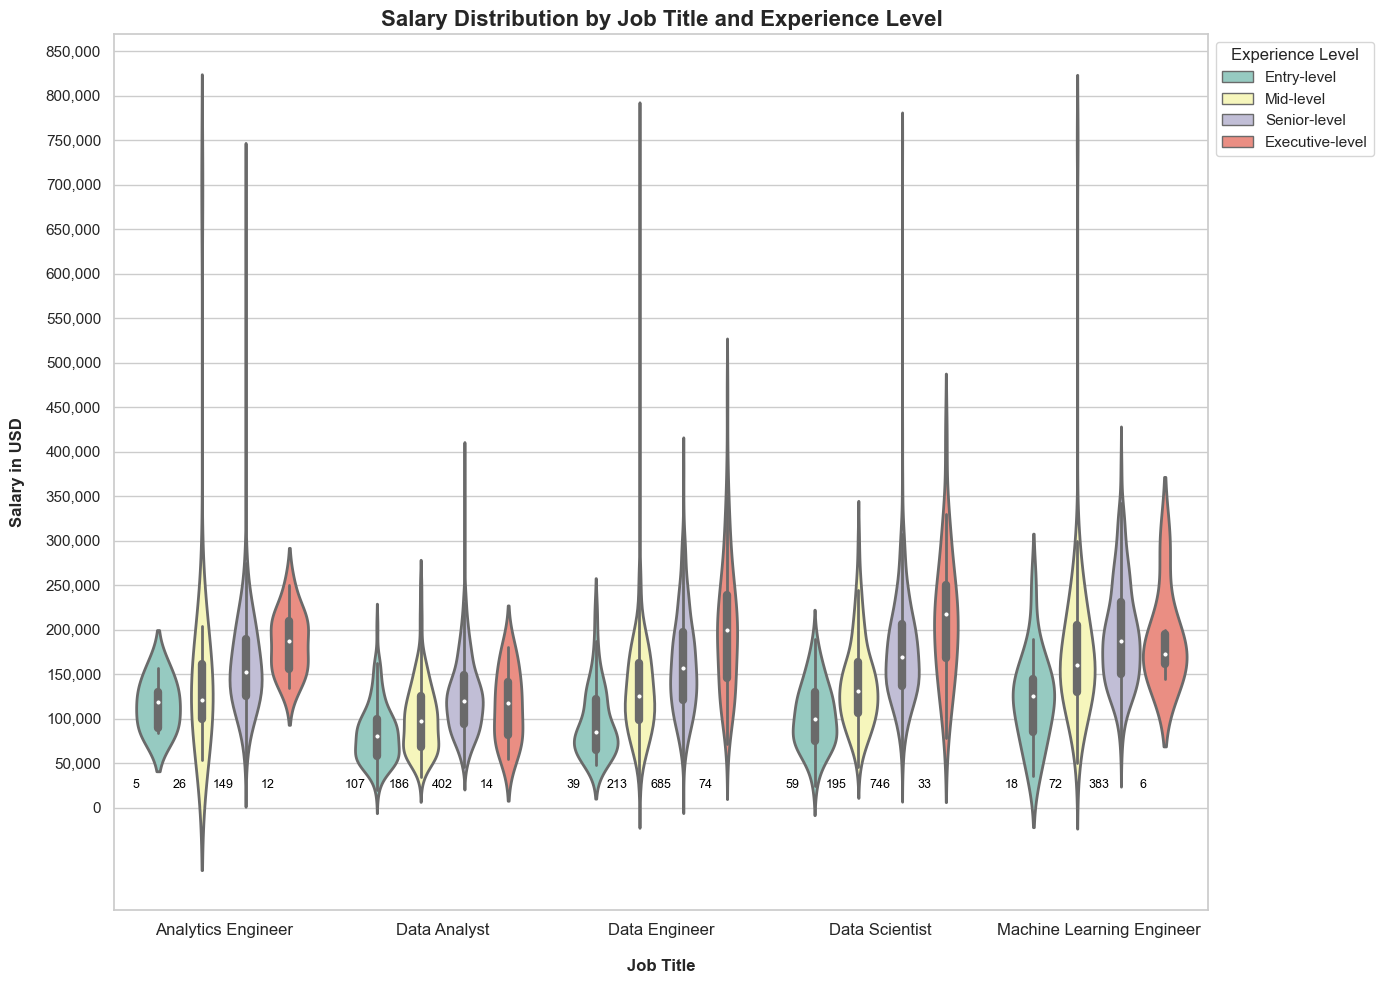

In [14]:
# Create a Visualization (Violin plot) to display statistical differences

plt.figure(figsize=(14, 10))
sns.set(style="whitegrid")

# Create the violin plot
ax = sns.violinplot(x='job_title', y='salary', hue='experience_level', data=refined_data_df, palette='Set3', linewidth = 2)

# Custom formatter function to format the y-axis labels
def thousands_formatter(x, pos):
    return '{:,.0f}'.format(x)

ax.yaxis.set_major_formatter(FuncFormatter(thousands_formatter))

# Increase font size of the x-axis label
ax.set_xlabel('Job Title', fontsize=12, labelpad=15, fontweight='bold')

# Increase font size of the x-axis tick labels
ax.set_xticklabels(ax.get_xticklabels(), fontsize=12) 

# Increase font size of the x-axis label
ax.set_ylabel('Salary in USD', fontsize=12, labelpad=15, fontweight='bold')

# Calculate counts
counts = refined_data_df.groupby(['job_title', 'experience_level']).size().reset_index(name='counts')

# Unique job titles for positioning
job_titles = refined_data_df['job_title'].unique()

# Assuming there are 4 experience levels as listed
num_experience_levels = len(['Entry-level', 'Mid-level', 'Senior-level', 'Executive-level'])

# Loop through the text and place a label for each violin
for i, job_title in enumerate(job_titles):
    for j, experience_level in enumerate(['Entry-level', 'Mid-level', 'Senior-level', 'Executive-level']):
        # Find the count for this combination
        count = counts[(counts['job_title'] == job_title) & (counts['experience_level'] == experience_level)]['counts']
        if not count.empty:
            # Adjust the x position slightly for each experience level to prevent stacking
            # The adjustment depends on the number of experience levels and the current level being processed
            x_position = i + (j - num_experience_levels / 2) * (1 / (num_experience_levels + 1))
            
            # Positioning the text below the violins can be tricky; adjust the positioning as necessary
            ax.text(x_position, refined_data_df['salary'].min() - (0.05 * refined_data_df['salary'].min()), f'{count.values[0]}', 
                    color='black', ha='center', va='bottom', fontsize=9)

plt.title('Salary Distribution by Job Title and Experience Level', fontsize=16, fontweight='bold')
plt.xlabel('Job Title')
plt.ylabel('Salary in USD')
plt.xticks(rotation=0)
plt.yticks(range(0, 900000, 50000))
plt.legend(title='Experience Level', bbox_to_anchor=(1.00, 1), loc='upper left')

plt.tight_layout()
plt.show()

In [15]:
# Create DataFrames containing only specific Job Titles
data_scientist_df = clean_data_df[clean_data_df["job_title"] == 'Data Scientist']
data_engineer_df = clean_data_df[clean_data_df["job_title"] == 'Data Engineer']
data_analyst_df = clean_data_df[clean_data_df["job_title"] == 'Data Analyst']
machine_learning_engineer_df = clean_data_df[clean_data_df["job_title"] == 'Machine Learning Engineer']
analytics_engineer_df = clean_data_df[clean_data_df["job_title"] == 'Analytics Engineer']

# Create DataFrame describing statistical measures
df_ds = data_scientist_df.groupby('experience_level')['salary'].describe()
df_de = data_engineer_df.groupby('experience_level')['salary'].describe()
df_da = data_engineer_df.groupby('experience_level')['salary'].describe()
df_mle = machine_learning_engineer_df.groupby('experience_level')['salary'].describe()
df_ae = analytics_engineer_df.groupby('experience_level')['salary'].describe()

# Choose specific statistical measures and reformat
df_ds = df_ds[['count', 'min', '25%', '50%', '75%', 'max']].assign(
    count=lambda x: x['count'].apply('{:,.0f}'.format),
    min=lambda x:x['min'].apply('{:,.0f}'.format),
    max=lambda x:x['max'].apply('{:,.0f}'.format),
    **{quartile: df_ds[quartile].apply('{:,.0f}'.format) for quartile in ['25%', '50%', '75%']}
)

df_de = df_de[['count', 'min', '25%', '50%', '75%', 'max']].assign(
    count=lambda x: x['count'].apply('{:,.0f}'.format),
    min=lambda x:x['min'].apply('{:,.0f}'.format),
    max=lambda x:x['max'].apply('{:,.0f}'.format),
    **{quartile: df_de[quartile].apply('{:,.0f}'.format) for quartile in ['25%', '50%', '75%']}
)

df_da = df_da[['count', 'min', '25%', '50%', '75%', 'max']].assign(
    count=lambda x: x['count'].apply('{:,.0f}'.format),
    min=lambda x:x['min'].apply('{:,.0f}'.format),
    max=lambda x:x['max'].apply('{:,.0f}'.format),
    **{quartile: df_da[quartile].apply('{:,.0f}'.format) for quartile in ['25%', '50%', '75%']}
)

df_mle = df_mle[['count', 'min', '25%', '50%', '75%', 'max']].assign(
    count=lambda x: x['count'].apply('{:,.0f}'.format),
    min=lambda x:x['min'].apply('{:,.0f}'.format),
    max=lambda x:x['max'].apply('{:,.0f}'.format),
    **{quartile: df_mle[quartile].apply('{:,.0f}'.format) for quartile in ['25%', '50%', '75%']}
)
# df_ae
df_ae = df_ae[['count', 'min', '25%', '50%', '75%', 'max']].assign(
    count=lambda x: x['count'].apply('{:,.0f}'.format),
    min=lambda x:x['min'].apply('{:,.0f}'.format),
    max=lambda x:x['max'].apply('{:,.0f}'.format),
    **{quartile: df_ae[quartile].apply('{:,.0f}'.format) for quartile in ['25%', '50%', '75%']}
)

# Create and add the Job Title column
df_ds['Job Title'] = 'Data Scientist'
df_de['Job Title'] = 'Data Engineer'
df_da['Job Title'] = 'Data Analyst'
df_mle['Job Title'] = 'Machine Learning Engineer'
df_ae['Job Title'] = 'Analytics Engineer'

# Combine the five individual Job Title DataFrames
combined_df = pd.concat([df_ds, df_de, df_da, df_mle, df_ae], axis=0)

combined_df.reset_index(inplace=True)

# Reorder Job Title column
combined_df = combined_df[['Job Title', 'experience_level', 'count', 'min', '25%', '50%', '75%', 'max']]

In [16]:
experience_level_order = {
    'Entry-level': 1,
    'Mid-level': 2,
    'Senior-level': 3,
    'Executive-level': 4
}

combined_df['experience_level_order'] = combined_df['experience_level'].map(experience_level_order)

combined_df_sorted = combined_df.sort_values(by=['Job Title', 'experience_level_order'])

combined_df_sorted = combined_df_sorted.drop('experience_level_order', axis=1)

combined_df_sorted.reset_index(drop=True, inplace=True)

combined_df_sorted

,Job Title,experience_level,count,min,25%,50%,75%,max
0,Analytics Engineer,Entry-level,5,"84,000","90,000","119,200","130,000","156,450"
1,Analytics Engineer,Mid-level,26,"54,000","100,000","121,250","161,250","700,000"
2,Analytics Engineer,Senior-level,149,"48,000","125,000","152,500","190,000","700,000"
3,Analytics Engineer,Executive-level,12,"135,000","156,000","187,500","210,000","250,000"
4,Data Analyst,Entry-level,39,"48,000","65,000","85,000","122,500","220,000"
5,Data Analyst,Mid-level,213,"20,000","99,000","125,000","162,000","750,000"
6,Data Analyst,Senior-level,685,"25,000","121,400","156,400","197,430","385,000"
7,Data Analyst,Executive-level,74,"71,908","145,250","200,000","239,000","465,000"
8,Data Engineer,Entry-level,39,"48,000","65,000","85,000","122,500","220,000"
9,Data Engineer,Mid-level,213,"20,000","99,000","125,000","162,000","750,000"
